In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import keras
from keras.datasets import mnist
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('Train image:', x_train.shape)
print('Test image:', x_test.shape)

Train image: (60000, 28, 28)
Test image: (10000, 28, 28)


[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


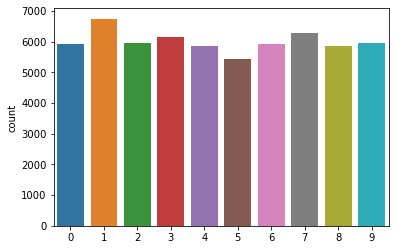

In [5]:
import seaborn as sns
import numpy as np

(number, counts) = np.unique(y_train, return_counts=True)
g = sns.countplot(y_train)
print(number)
print(counts)

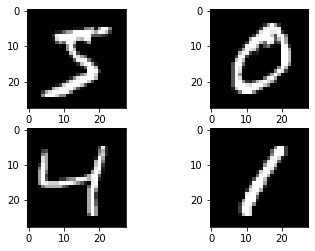

In [6]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(222)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(223)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(224)
plt.imshow(x_train[3], cmap='gray')
plt.savefig('Number.png', dpi=300)
plt.show()

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 2.1455 - accuracy: 0.8507
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3438 - accuracy: 0.9149
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2738 - accuracy: 0.9313
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2469 - accuracy: 0.9386
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2226 - accuracy: 0.9438
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2131 - accuracy: 0.9469
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1976 - accuracy: 0.9517
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1928 - accuracy: 0.9525
Epoch 9/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1930 - accuracy: 0.9539
Epoch 10/10
60000/60000 [==============================

In [9]:
v_loss, v_acc = model.evaluate(x_test, y_test)
print(v_loss, v_acc)

10000/10000 [==============================] - 0s 41us/step
0.255426550387498 0.9430999755859375


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]